# Chapter 6 - Unsupervised Machine Learning

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")

In [2]:
# Import Data
df = pd.read_csv("../../datasets/dataset_wisc_sd.csv")
print(df.shape)

# Cleaning up
df = df.replace(r'\\n','', regex=True) 
df = df.dropna()
print(df.shape)

# Check first few rows
df.head()

(569, 32)
(562, 32)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


C:\Users\Saleh Alkhalifa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


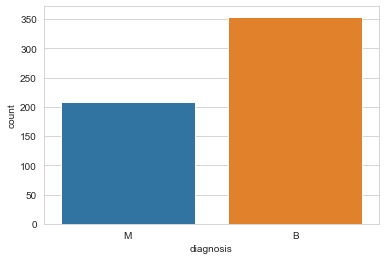

In [3]:
sns.countplot(df['diagnosis']);

In [4]:
# Encode the labels to be 1 for malignant and 0 for benign
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.186,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.243,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


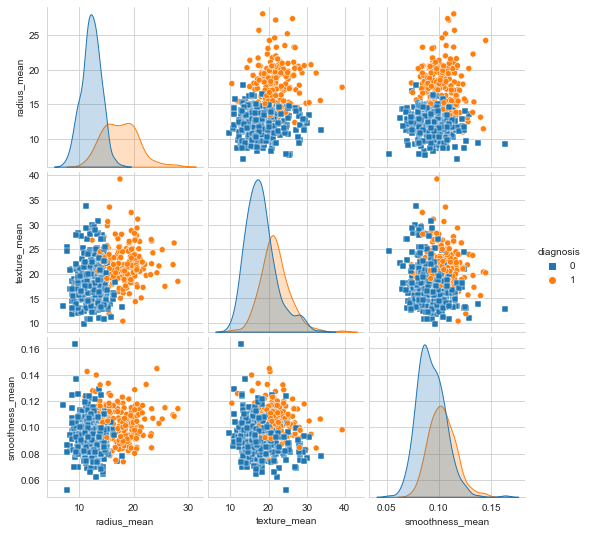

In [6]:
select_feats = ["diagnosis", "radius_mean", "texture_mean", "smoothness_mean"]
sns_plot = sns.pairplot(df[select_feats], hue = 'diagnosis', markers=["s", "o"])

In [7]:
sns_plot.savefig("c6_cancer_pairplot.png")

<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

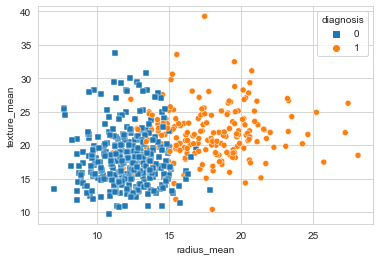

In [16]:
sns.scatterplot(x="radius_mean", y="texture_mean", hue="diagnosis", style='diagnosis', data=df, markers=["s", "o"])

In [20]:
df.shape

(562, 32)

In [8]:
# We can drop a few variables to avoid any multicollinearity, however KMeans clustering is not generally affected by it.

import numpy as np

# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

In [9]:
df.shape

(562, 23)

In [10]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean',
       'compactness_mean', 'concavity_mean', 'symmetry_mean',
       'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df.drop(columns = ["id", "diagnosis"])
y = df.diagnosis.values

X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled.head(3)

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,...,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.095432,-2.071547,1.568265,3.313831,2.654770,2.219596,2.276907,2.486111,-0.565868,-0.214823,...,0.729087,0.684116,1.158122,0.924202,1.311579,2.687591,2.136591,2.299912,2.759909,2.030486
1,1.825827,-0.352468,-0.821208,-0.481331,-0.019743,0.005860,-0.870067,0.499147,-0.881045,-0.604835,...,-0.435502,0.276978,-0.802463,-0.092378,-0.373512,-0.427937,-0.141086,1.092336,-0.238156,0.305317
2,1.576700,0.457057,0.943566,1.068703,1.366437,0.943142,-0.396022,1.227280,-0.783586,-0.297543,...,0.218233,1.460481,0.243425,0.304550,0.530469,1.119420,0.870139,1.959235,1.159645,0.222177


### AgglomerativeClustering

In [30]:
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=2, linkage="ward")
agc_featAll_pred = agc.fit_predict(X_scaled.iloc[:, :2])

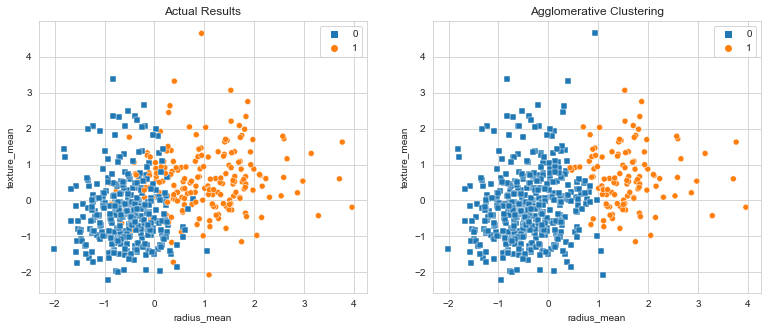

In [31]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.title("Actual Results")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=y, style=y, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

plt.subplot(132)
plt.title("Agglomerative Clustering")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=agc_featAll_pred, style=agc_featAll_pred, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

In [32]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, agc_featAll_pred))

0.8327402135231317


### KMeans:

In [33]:
from sklearn.cluster import KMeans
kmc = KMeans(n_clusters=2, n_init=10, init="k-means++")
kmc_feat2_pred = kmc.fit_predict(X_scaled.iloc[:, :2])
kmc_feat2_pred_inv = 1-kmc_feat2_pred

In [39]:
kmc_feat2_pred_inv[:5]

array([0, 1, 1, 0, 1])

In [40]:
kmc_feat2_pred[:5]

array([1, 0, 0, 1, 0])

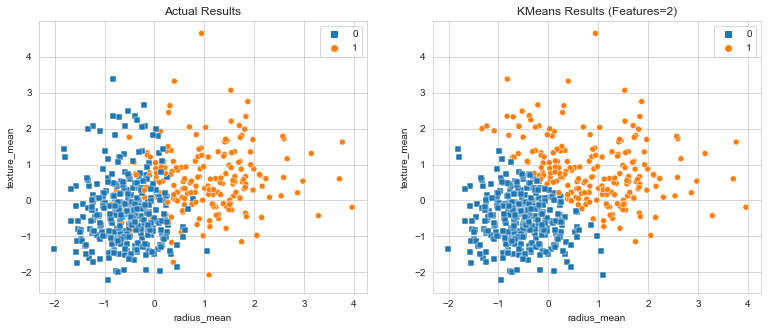

In [69]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.title("Actual Results")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=y, style=y, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

plt.subplot(132)
plt.title("KMeans Results (Features=2)")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=kmc_pred_inv, style=kmc_pred_inv, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

In [34]:
# Non-pythonic, for illustration only, best to iterate

kmc_feat2_pred = kmc.fit_predict(X_scaled.iloc[:, :2])
kmc_feat3_pred = kmc.fit_predict(X_scaled.iloc[:, :3])
kmc_feat4_pred = kmc.fit_predict(X_scaled.iloc[:, :4])
kmc_featall_pred = kmc.fit_predict(X_scaled.iloc[:, :])

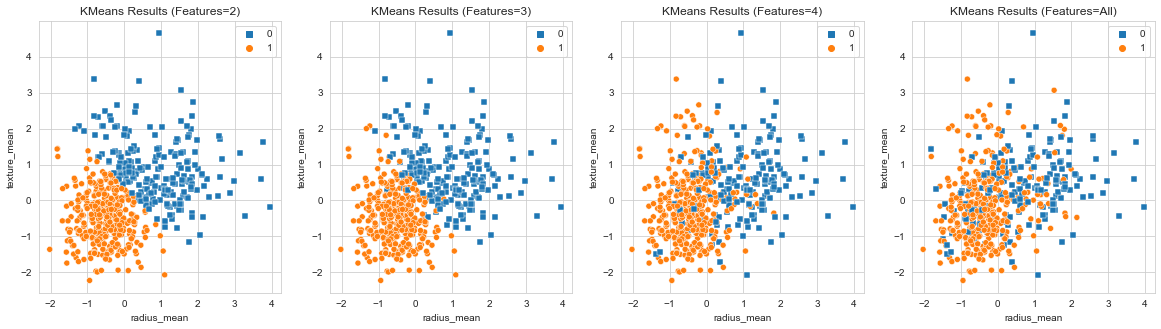

In [175]:
plt.figure(figsize=(20, 5))

plt.subplot(141)
plt.title("KMeans Results (Features=2)")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=kmc_feat2_pred, style=kmc_feat2_pred, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

plt.subplot(142)
plt.title("KMeans Results (Features=3)")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=kmc_feat3_pred, style=kmc_feat3_pred, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

plt.subplot(143)
plt.title("KMeans Results (Features=4)")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=kmc_feat4_pred, style=kmc_feat4_pred, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

plt.subplot(144)
plt.title("KMeans Results (Features=All)")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=kmc_featall_pred, style=kmc_featall_pred, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

In [35]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y, kmc_feat2_pred))
print(accuracy_score(y, kmc_feat3_pred))
print(accuracy_score(y, kmc_feat4_pred))
print(accuracy_score(y, kmc_featall_pred))


0.8629893238434164
0.8932384341637011
0.896797153024911
0.8274021352313167


### Gaussian Mixture

In [44]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=2, covariance_type="full")
gmm_featAll_pred = 1-gmm.fit_predict(X_scaled.iloc[:, :2])

In [45]:
print(accuracy_score(y, gmm_featAll_pred))

0.8505338078291815


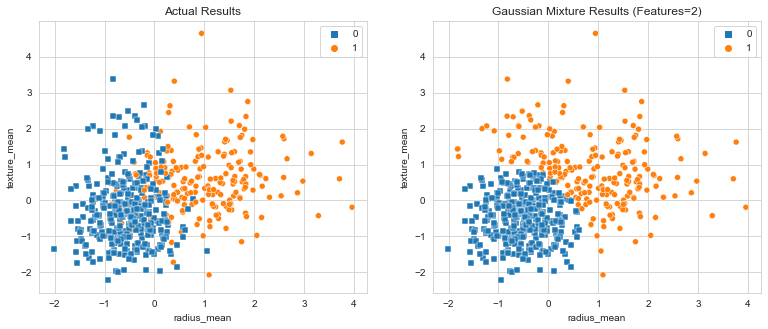

In [46]:
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.title("Actual Results")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=y, style=y, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

plt.subplot(132)
plt.title("Gaussian Mixture Results (Features=2)")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=gmm_featAll_pred, style=gmm_featAll_pred, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

In [47]:
gmm_feat2_pred = 1-gmm.fit_predict(X_scaled.iloc[:, :2])
gmm_feat3_pred = 1-gmm.fit_predict(X_scaled.iloc[:, :3])
gmm_feat4_pred = 1-gmm.fit_predict(X_scaled.iloc[:, :4])
gmm_featall_pred = 1-gmm.fit_predict(X_scaled.iloc[:, :])

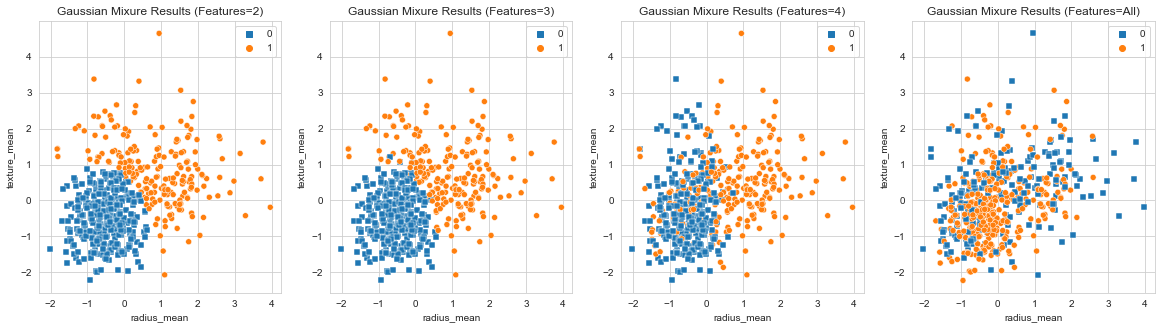

In [49]:
plt.figure(figsize=(20, 5))

plt.subplot(141)
plt.title("Gaussian Mixure Results (Features=2)")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=gmm_feat2_pred, style=gmm_feat2_pred, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

plt.subplot(142)
plt.title("Gaussian Mixure Results (Features=3)")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=gmm_feat3_pred, style=gmm_feat3_pred, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

plt.subplot(143)
plt.title("Gaussian Mixure Results (Features=4)")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=gmm_feat4_pred, style=gmm_feat4_pred, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

plt.subplot(144)
plt.title("Gaussian Mixure Results (Features=All)")
ax = sns.scatterplot(x="radius_mean", y="texture_mean", hue=gmm_featall_pred, style=gmm_featall_pred, data=X_scaled, markers=["s", "o"])
ax.legend(loc="upper right")

In [51]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y, gmm_feat2_pred))
print(accuracy_score(y, gmm_feat3_pred))
print(accuracy_score(y, gmm_feat4_pred))
print(accuracy_score(y, gmm_featAll_pred))


0.8469750889679716
0.8523131672597865
0.8398576512455516
0.8505338078291815


### Principal Component Analysis:

In [65]:
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2, svd_solver='full')
pca_2d.fit(X_scaled)

data_pca_2d = pca_2d.fit_transform(X_scaled)

print(pca_2d.explained_variance_ratio_)

[0.43479052 0.14355451]


<AxesSubplot:xlabel='Principal Component 1', ylabel='Principal Component 2'>

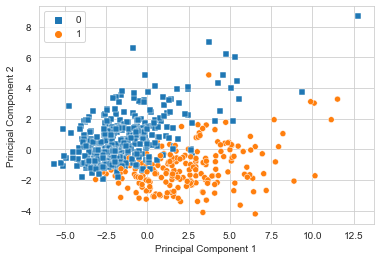

In [73]:
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
sns.scatterplot(x=data_pca_2d[:,0], y=data_pca_2d[:,1], hue=y, style=y, markers=["s", "o"])

In [70]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

gmm = GaussianMixture(n_components=2, covariance_type="full")
gmm_featAll_pred = 1-gmm.fit_predict(data_pca_2d)


In [61]:
%%timeit
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

gmm = GaussianMixture(n_components=2, covariance_type="full")
gmm_featAll_pred = 1-gmm.fit_predict(data_pca_2d)


3.81 ms ± 42.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [63]:
%%timeit
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

gmm = GaussianMixture(n_components=2, covariance_type="full")
gmm_featAll_pred = 1-gmm.fit_predict(X_scaled)


18.4 ms ± 458 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [64]:
%%timeit
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score

gmm = GaussianMixture(n_components=2, covariance_type="full")
gmm_featAll_pred = 1-gmm.fit_predict(X)


9.15 ms ± 275 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
